The purpose of this notebook is to build up step by step the figures in Russel's paper published in 1998 in The Leading Edge 17, p 885: "A simple seismic imaging exercice".

We will see that the knowledge required to reproduce these figures with Python is very limited. Our two main tools will be line equations and the matplotlib module.

First, we import the modules we need and we define constant variables. These constants can be tweaked as the rest of this notebook is built to dynamically calculate everything needed to plot figures (according to these constants).

In [1]:
# Import useful modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import math

# Constants needed to build every figures (default values correspond to the orginial Russel's paper)
# These are parameters you can tweak to see how they alter every figure
distance_from_origin = 10.0
distance_from_source = 20.0
refector_slope = -0.5

## Figure 1

We can instantiate variables corresponding to 2D coordinates of $O$ (origin), $S$ (shot), $R$ (receiver) and $M$ (midpoint).

In [2]:
# Basic points, defined as tuples (x, y[, label])
origin_point = (0.0, 0.0, 'O=0')
Sx = distance_from_origin
Sy = 0.0
shot_point = (Sx, Sy, 'S=Shot')
Rx = Sx+distance_from_source
Ry = 0.0
receiver_point = (Rx, Ry, 'R=Receiver')
Mx = Sx+(distance_from_source/2.0)
My = 0.0
mid_point = (Mx, My, 'M=Midpoint')

Before we dive into the construction of complex figures, we should write utility functions to help us plotting a template corresponding to figure 1. This template will be reused to plot every upcoming figure.

In [3]:
# Plot and annotate the given list of points
# A point is assumed to be defined as a tuple (x, y[, label])
def plot_points(points_to_draw):
    for p in points_to_draw:
        plt.plot(p[0], p[1], marker="o", markersize=5, markeredgecolor="black", markerfacecolor="white")
        if len(p)>2:
            plt.annotate(p[2],
                 (p[0], p[1]),
                 textcoords="offset points",
                 xytext=(1,5),
                 ha='left')

# Build template plot (corresponding to figure 1)
def make_plot():
    # Surface (horizontal)
    plt.axhline(y=0.0, color='b', linestyle='-')
    
    # Dipping Reflector
    # Passes through origin point, with a slope equal to the constant defined as "refector_slope"
    plt.axline((0.0, 0.0), slope=refector_slope, color='r', linestyle='-')
    
    # Base points
    plot_points([origin_point, shot_point, receiver_point, mid_point])

    ax = plt.gca()

    # Force display limits
    ax.set_xlim(-1.0, Rx+5.0)
    ax.set_ylim(-Rx, 2.0)
    
    # Change major ticks to show every 10
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.set_major_locator(MultipleLocator(10))
    
    # Change minor ticks to show every 1 (10/10)
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(10))
    
    # Turn grid on for both major and minor ticks
    ax.grid(which='major', color='#CCCCCC', linestyle='-')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    
    ax.set_aspect('equal')

Now we can plot the first figure easily and use it as a template to build more advanced figures. We just have to call make_plot().

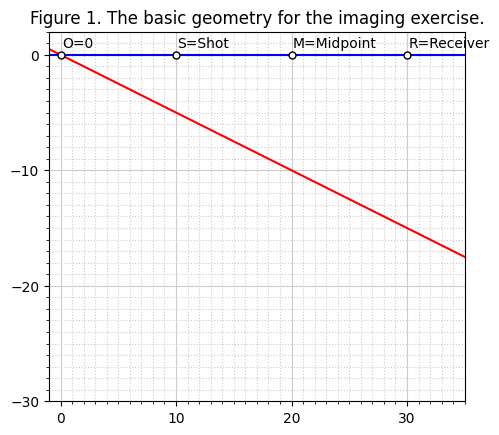

In [4]:
make_plot()

plt.title('Figure 1. The basic geometry for the imaging exercise.')
plt.show()

Note that the dipping reflector is represented by a line following the equation:
$$
y = a_0.x+b_0
$$
with $a_0=refector\_slope$ and $b_0=0$

## Figure 2

The line that passes through S, intersecting the reflector at right angle has the following equation:
$$
y = a_1.x+b_1
$$
with $a_1=-\frac{1}{a_0}$ and $b_1=-a_1.S_x$

Let's use Python to calculate these values.

In [5]:
# Do the maths!
a0 = refector_slope
b0 = 0.0
a1 = -1/a0
b1 = -a1*Sx

print(f'a1={a1} b1={b1}')

a1=2.0 b1=-20.0


Now let's plot this line.

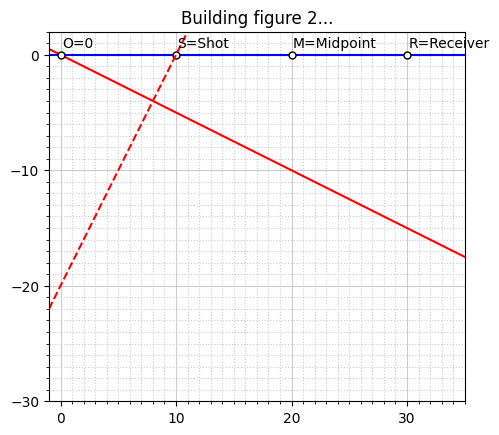

In [6]:
# Plot template (Figure 1)
make_plot()

# Line passing through S, intersects the reflector at right angle
plt.axline((Sx, Sy), slope=a1, color='r', linestyle='--')

plt.title('Building figure 2...')
plt.show()

We can easily calculate the point $I$ where this new line intersects the reflector:
$$
a_1.I_x-b_1 = a_0.I_x + b_0
$$
$$
I_x = \frac{b_1-b_0}{a_0-a1}
$$

And using equation of the reflector:
$$
I_y = a_0.I_x + b_0
$$

Let's use Python to get I's coordiates.

In [7]:
Ix = (b1-b0)/(a0-a1)
Iy = a0*Ix + b0
I_point = (Ix, Iy, 'I')

print(f'I({Ix};{Iy})')

I(8.0;-4.0)


We add point $I$ to the plot.

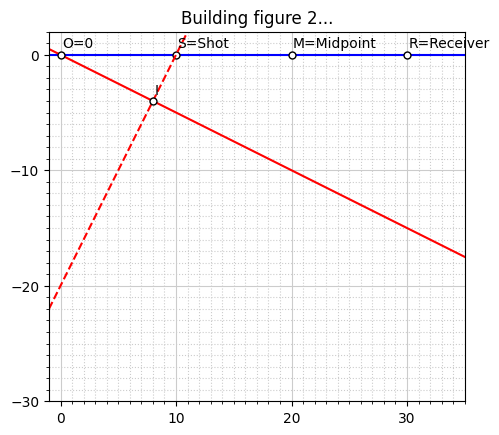

In [8]:
# Plot template (Figure 1)
make_plot()

# Line passing through S, intersects the reflector at right angle
plt.axline((Sx, Sy), slope=a1, color='r', linestyle='--')

# Intersection
plot_points([I_point])

plt.title('Building figure 2...')
plt.show()

Coordinates of point $S'$ can be calculated easily according to $S$ and $I$:
$$
S'_x = 2I_x - S_x
$$
$$
S'_y = a_1.S'_x + b_1
$$

In [9]:
Spx = 2*Ix - Sx
Spy = a1*Spx + b1
Sp_point = (Spx, Spy, "S'")

print(f'S\'({Spx};{Spy})')

S'(6.0;-8.0)


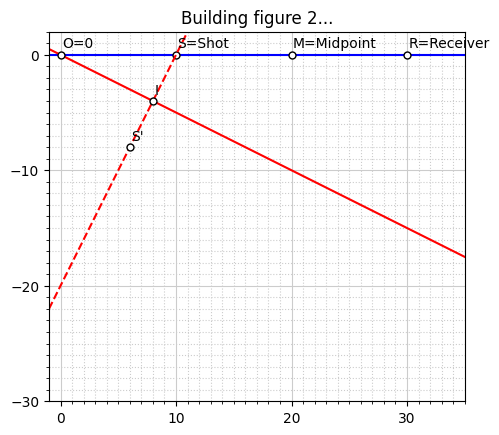

In [10]:
# Plot template (Figure 1)
make_plot()

# Line passing through S, intersects the reflector at right angle
plt.axline((Sx, Sy), slope=a1, color='r', linestyle='--')

# Intersection and S'
plot_points([I_point, Sp_point])

plt.title('Building figure 2...')
plt.show()

The line passing through $S'$ and $R$ can be defined by the following equation:
$$
y = a_2x+b_2
$$
with $a_2=\frac{-S'_y}{R_x-S'_x}$ and $b_2=-a_2 . R_x$.

I don't give details of the calculations leading to this result here, but it can easily be obtained by manipulating the former equation of lines.

In [11]:
a2 = -Spy/(Rx-Spx)
b2 = -a2*Rx

print(f'a2={a2} b2={b2}')

a2=0.3333333333333333 b2=-10.0


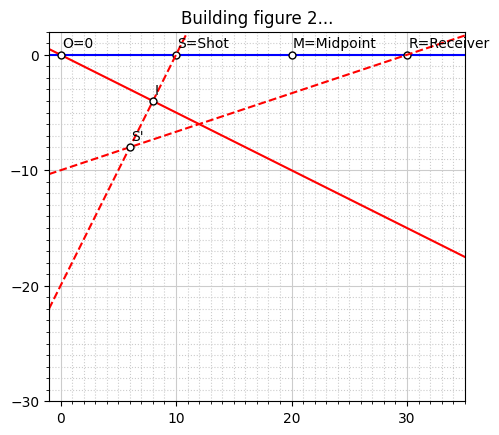

In [12]:
# Plot template (Figure 1)
make_plot()

# Line passing through S, intersects the reflector at right angle
plt.axline((Sx, Sy), slope=a1, color='r', linestyle='--')

# Line passing through S' and R
plt.axline((Rx, Ry), slope=a2, color='r', linestyle='--')

# Intersection and S'
plot_points([I_point, Sp_point])

plt.title('Building figure 2...')
plt.show()

Just like for $I$, we can calculate the point $P$ where this new line intersects the reflector:
$$
a_2.P_x-b_2 = a_0.x + b_0
$$
$$
P_x = \frac{b_2-b_0}{a_0-a2}
$$

And using equation of the reflector:
$$
P_y = a_0.P_x + b_0
$$

In [13]:
Px = (b2-b0)/(a0-a2)
Py = a0*Px + b0
P_point = (Px, Py, 'P')

print(f'P({Px};{Py})')

P(12.000000000000002;-6.000000000000001)


We need a last point to plot the full figure 2: $N$. Following the same logic as we did, we can define coordinates of $N$ with regards of known variables. As a matter of fact, $N$ is on a line parallel to $y=a_1x+b_1$ that passes though $P$.

$$
N_x = a_0.P_y + P_x
$$
$$
N_y = 0
$$

We now have everything to plot Figure 2.

In [14]:
Nx = (a0*Py) + Px
Ny = 0.0
N_point = (Nx, Ny, 'N')

print(f'N({Nx};{Ny})')

N(15.000000000000002;0.0)


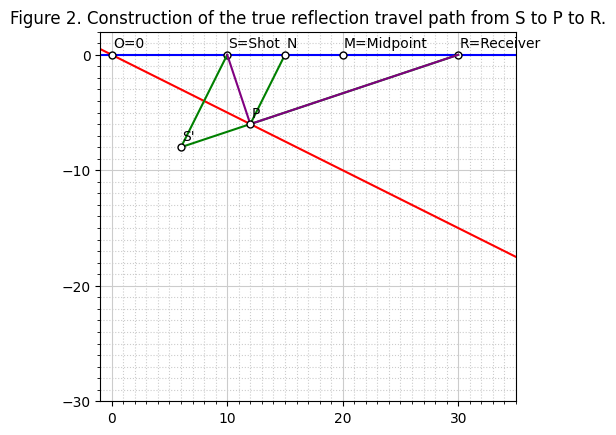

In [15]:
# Plot template (Figure 1)
make_plot()

# S to S'
plt.plot([Sx, Spx], [Sy, Spy], color='g', linestyle='-')
# S' to R
plt.plot([Rx, Spx], [Ry, Spy], color='g', linestyle='-')
# N to P
plt.plot([Nx, Px], [Ny, Py], color='g', linestyle='-')

# True reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# N, P and S'
plot_points([N_point, P_point, Sp_point])

plt.title('Figure 2. Construction of the true reflection travel path from S to P to R.')
plt.show()

## Figure 3

The next figure introduces a new point $P'$ to illustrate the zero dip NMO assumption. $P'$ is right under $M$ at a depth $d$. Equation (3) in the paper gives us $L^2 = d^2 + h^2$ whith $L$ being the length of each raypath and $h$ the distance between $S$ and $M$.

It is trivial to express $d$ as a function of $L$ and $h$: $d = \sqrt{L^2 - h^2}$

What is the value of $L$ and $h$?

As for $h$ it is quite easy as we already know points $S$ and $M$: $h = M_x-S_x$

Finally, $L$ being the length of each raypath, it is equal to half the true travel path length and we know it: $L = \frac{SP + PR}{2}$

Let's use Python to plot Figure 3.

In [16]:
L = (math.dist((Sx, Sy), (Px, Py)) + math.dist((Rx, Ry), (Px, Py))) / 2.0
h = Mx-Sx
d = math.sqrt(L*L - h*h)

Ppx = Mx
Ppy = -d
Pp_point = (Ppx, Ppy, "P'")

print(f'L = {L}')
print(f'h = {h}')
print(f'd = {d}')
print(f"P'({Ppx};{Ppy})")

L = 12.649110640673518
h = 10.0
d = 7.745966692414836
P'(20.0;-7.745966692414836)


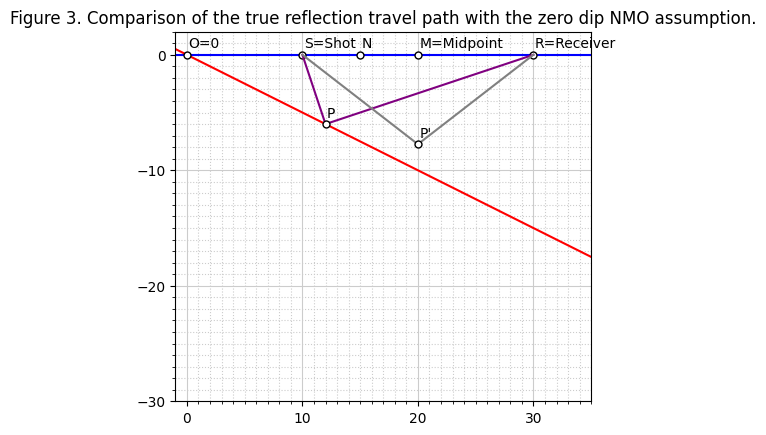

In [17]:
# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P and P'
plot_points([N_point, P_point, Pp_point])

plt.title('Figure 3. Comparison of the true reflection travel path with the zero dip NMO assumption.')
plt.show()

## Figure 4

We are ready to plot the full prestack time migration ellipse. This is straight forward using matplotlib Ellipse feature.

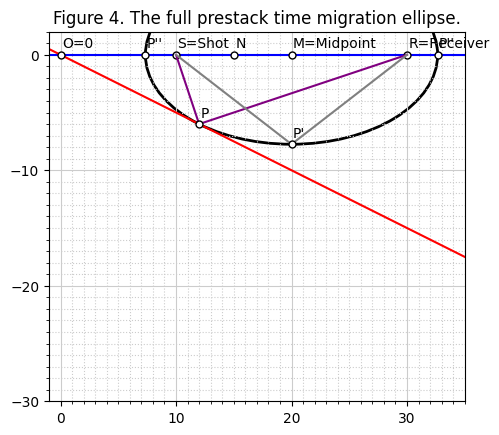

In [18]:
from matplotlib.patches import Ellipse

# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P, P', P''
Ppp1_point = (Mx-L, My, "P''")
Ppp2_point = (Mx+L, My, "P''")
plot_points([N_point, P_point, Pp_point, Ppp1_point, Ppp2_point])

# full prestack Ellipse
prestack_ellipse = Ellipse([Mx, My], L*2, d*2, linewidth=2, fill=False)
plt.gca().add_artist(prestack_ellipse)

plt.title('Figure 4. The full prestack time migration ellipse.')
plt.show()

## Figure 5

Post stack migration ellipse and DMO ellipse are even more simple to plot:

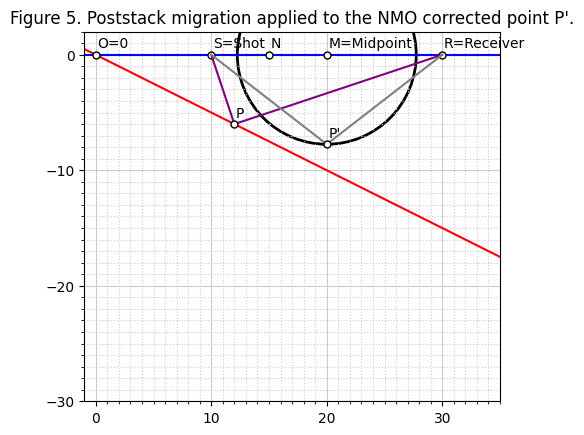

In [19]:
# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P, P'
plot_points([N_point, P_point, Pp_point])

# post stack migration Ellipse
poststack_ellipse = Ellipse([Mx, My], d*2, d*2, linewidth=2, fill=False)
plt.gca().add_artist(poststack_ellipse)

plt.title('Figure 5. Poststack migration applied to the NMO corrected point P\'.')
plt.show()

## Figure 6

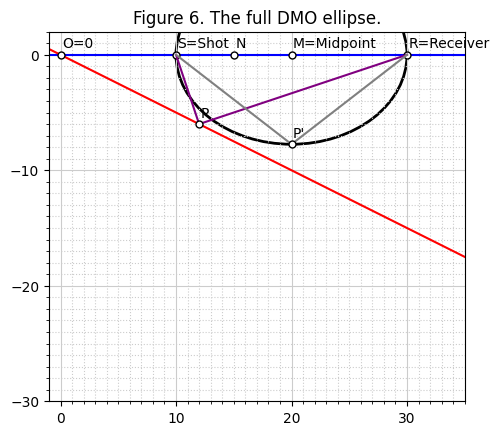

In [20]:
# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# zero dip NMO assumption:     S to P' to R
plt.plot([Sx, Ppx], [Sy, Ppy], color='grey', linestyle='-')
plt.plot([Rx, Ppx], [Ry, Ppy], color='grey', linestyle='-')

# N, P, P'
plot_points([N_point, P_point, Pp_point])

# DMO Ellipse
dmo_ellipse = Ellipse([Mx, My], h*2, d*2, linewidth=2, fill=False)
plt.gca().add_artist(dmo_ellipse)

plt.title('Figure 6. The full DMO ellipse.')
plt.show()

We lack point $Q$ in figure 6. $Q$ is located right below $N$, on DMO ellipse. To find $y$ coordinate of $Q$, we can use equation (8) from the paper:
$$
Q_y=-d\sqrt{1-(\frac{Nx-Mx}{h})^2}
$$

In [21]:
Qx = Nx
Qy = -d * math.sqrt(1 - ((Nx-Mx)/h)**2)
Q_point = (Qx, Qy, "Q")

print(f'Q({Qx};{Qy})')

Q(15.000000000000002;-6.708203932499372)


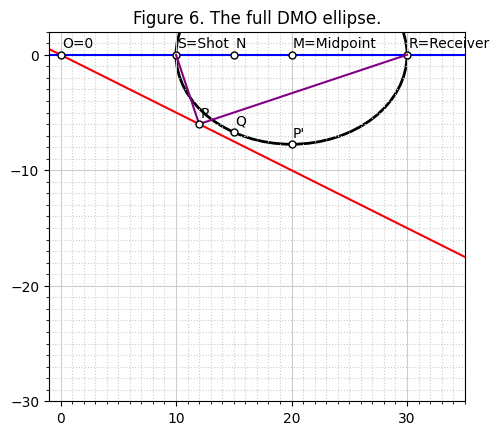

In [22]:
# Plot template (Figure 1)
make_plot()

# true reflection travel path: S to P to R
plt.plot([Sx, Px], [Sy, Py], color='purple', linestyle='-')
plt.plot([Rx, Px], [Ry, Py], color='purple', linestyle='-')

# N, P, P', Q
plot_points([N_point, P_point, Pp_point, Q_point])

# DMO Ellipse
dmo_ellipse = Ellipse([Mx, My], h*2, d*2, linewidth=2, fill=False)
plt.gca().add_artist(dmo_ellipse)

plt.title('Figure 6. The full DMO ellipse.')
plt.show()

## Figure 7

Finally, we can plot the post migration ellipse.

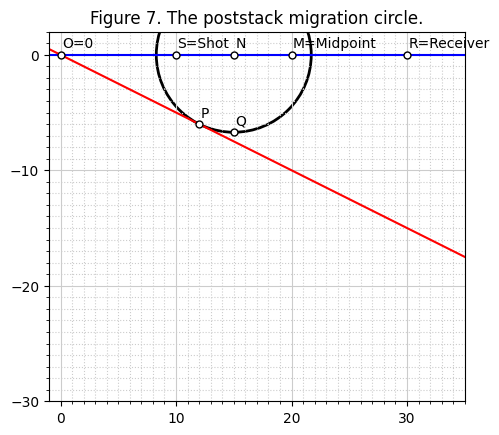

In [23]:
# Plot template (Figure 1)
make_plot()

# N, P, Q
plot_points([N_point, P_point, Q_point])

# Post migration Ellipse
post_migration_ellipse = Ellipse([Nx, Ny], Qy*2, Qy*2, linewidth=2, fill=False)
plt.gca().add_artist(post_migration_ellipse)

plt.title('Figure 7. The poststack migration circle.')
plt.show()

## Figure 8

And we can summaryze everything:

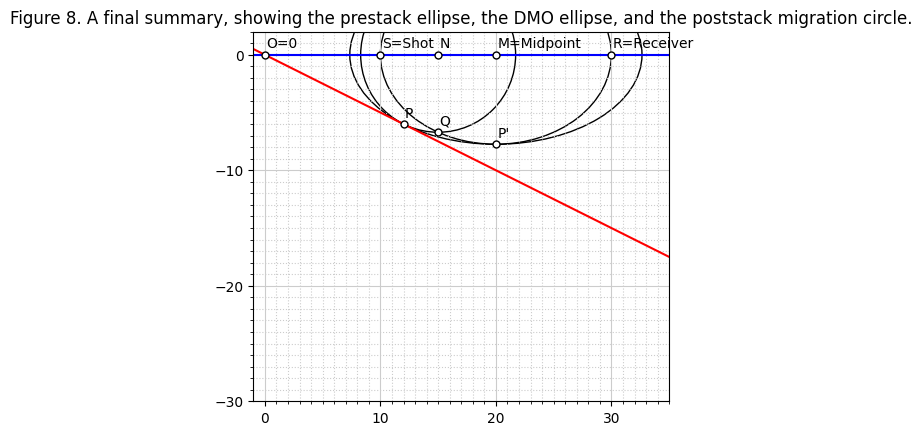

In [24]:
# Plot template (Figure 1)
make_plot()

# N, P, P', Q
plot_points([N_point, P_point, Pp_point, Q_point])

# Ellipses
prestack_ellipse = Ellipse([Mx, My], L*2, d*2, linewidth=1, fill=False)
plt.gca().add_artist(prestack_ellipse)
dmo_ellipse = Ellipse([Mx, My], h*2, d*2, linewidth=1, fill=False)
plt.gca().add_artist(dmo_ellipse)
post_migration_ellipse = Ellipse([Nx, Ny], Qy*2, Qy*2, linewidth=1, fill=False)
plt.gca().add_artist(post_migration_ellipse)

plt.title('Figure 8. A final summary, showing the prestack ellipse, the DMO ellipse, and the poststack migration circle.')
plt.show()